In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive
%cd '/content/gdrive/My Drive/DSF_proj/'
!ls


'My Drive'
/content/gdrive/My Drive/DSF_proj
 BreastCancer.ipynb	       GoogleNews-vectors-negative300.bin
 breast_cancer_wisconson.csv   MNIST_digit
'Copy of dsf_dim_red.ipynb'    MNIST_digitipynb.ipynb
 dsf_dim_red.ipynb	       Proposal.gdoc


In [0]:
!pip install python-mnist
!pip install hdbscan

In [0]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import glob

import pandas as pd


In [0]:
!ls './'

 BreastCancer.ipynb	       GoogleNews-vectors-negative300.bin
 breast_cancer_wisconson.csv   MNIST_digit
'Copy of dsf_dim_red.ipynb'    MNIST_digitipynb.ipynb
 dsf_dim_red.ipynb	       Proposal.gdoc


In [0]:
data = pd.read_csv('./breast_cancer_wisconson.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
# Drop the id column
data = data.drop('id', axis=1)
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

In [0]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module
import time


In [0]:
import umap
# Turn dataframe into arrays
X = data.values
# binary problem => reduce dim to 2
# PCA
pca = PCA(n_components=2)
st = time.time()
pcaRes = pca.fit_transform(X)
timePCA = time.time() - st

# TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
st = time.time()
tsneRes = tsne.fit_transform(X)
timeTSNE = time.time() - st

#UMAP
st = time.time()
umap = umap.UMAP(random_state=42)
umapRes = umap.fit_transform(X)
timeUMAP = time.time() - st


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.196220
[t-SNE] KL divergence after 2000 iterations: 0.212484


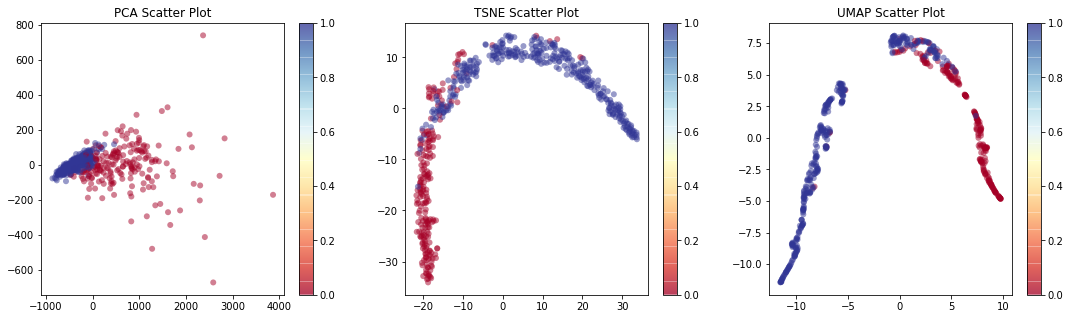

In [0]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (25,11))

plt.subplot(241)
plt.scatter(pcaRes[:,0],pcaRes[:,1], c = target, 
            cmap = 'RdYlBu', edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(242)
plt.scatter(tsneRes[:,0],tsneRes[:,1],  c = target, 
            cmap = 'RdYlBu', edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('TSNE Scatter Plot')

plt.subplot(243)
plt.scatter(umapRes[:,0], umapRes[:,1],  c = target, 
            cmap = 'RdYlBu', edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('UMAP Scatter Plot')

plt.show()

In [0]:
print(timePCA, timeTSNE, timeUMAP)


0.006401777267456055 5.798194646835327 1.5415632724761963


https://www.kaggle.com/arthurtok/tsne-pca-quick-and-dirty-visuals

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [0]:
# binary problem => reduce dim to 2
# PCA
import umap
pca = PCA(n_components=2)
st = time.time()
pcaRes = pca.fit_transform(X_std)
timePCA = time.time() - st

# TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
st = time.time()
tsneRes = tsne.fit_transform(X_std)
timeTSNE = time.time() - st

#UMAP
st = time.time()
umap = umap.UMAP(random_state=42)
umapRes = umap.fit_transform(X_std)
timeUMAP = time.time() - st

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.225883
[t-SNE] KL divergence after 2000 iterations: 0.922982


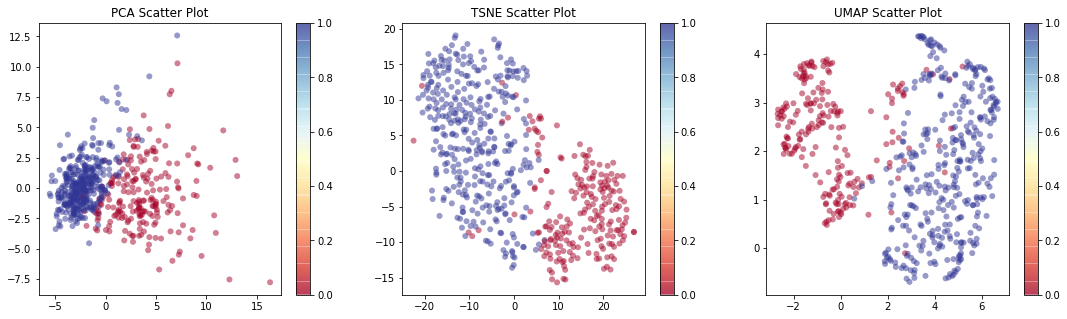

In [0]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (25,11))

plt.subplot(241)
plt.scatter(pcaRes[:,0],pcaRes[:,1], c = target, 
            cmap = 'RdYlBu', edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(242)
plt.scatter(tsneRes[:,0],tsneRes[:,1],  c = target, 
            cmap = 'RdYlBu', edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('TSNE Scatter Plot')

plt.subplot(243)
plt.scatter(umapRes[:,0], umapRes[:,1],  c = target, 
            cmap = 'RdYlBu', edgecolor = "None", alpha=0.5)
plt.colorbar()
plt.title('UMAP Scatter Plot')

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.0

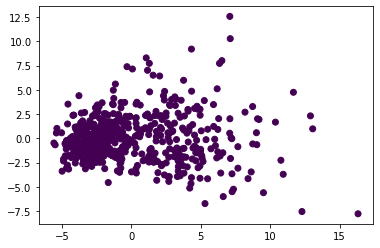

In [0]:
import hdbscan
from sklearn.metrics.cluster import adjusted_rand_score
hdb1 = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100).fit_predict(pcaRes)
clustered = (hdb1 >= 0)
plt.scatter(pcaRes[:, 0], pcaRes[:, 1], c=hdb1, cmap='viridis');
# print(clustered)
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(target, hdb1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


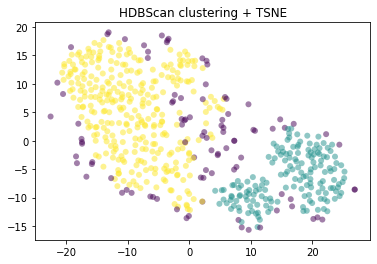

In [0]:
# hdb2 = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=100).fit_predict(tsneRes)
# clustered = (hdb2 >= 0)
# plt.scatter(tsneRes[clustered, 0], tsneRes[clustered, 1], c=hdb2[clustered], cmap='viridis');
# print(normalized_mutual_info_score(target[clustered], hdb2[clustered]))
# plt.title("HDBScan clustering + TSNE")
# plt.show()

hdb2 = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=100).fit_predict(tsneRes)
clustered = (hdb2 >= 0)
plt.scatter(tsneRes[:, 0], tsneRes[:, 1], c=hdb2, cmap='viridis', edgecolor = "None", alpha=0.5);
scoreTSNE = normalized_mutual_info_score(target, hdb2)
plt.title("HDBScan clustering + TSNE")
plt.show()

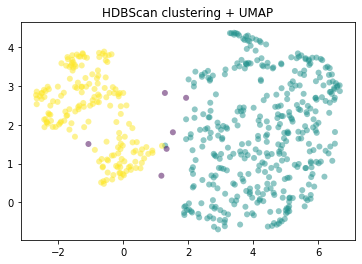

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:

hdb3 = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=100).fit_predict(umapRes)
clustered = (hdb3 >= 0)
plt.scatter(umapRes[:, 0], umapRes[:, 1], c=hdb3, cmap='viridis', edgecolor = "None", alpha=0.5);
# print(normalized_mutual_info_score(target, hdb3))
plt.title("HDBScan clustering + UMAP")
plt.show()

scoreUMAP = normalized_mutual_info_score(target[clustered], hdb3[clustered])


In [0]:
normScores = [0, scoreTSNE, scoreUMAP]
timeScores = [timePCA, timeTSNE, timeUMAP]
print(normScores, timeScores)

[0, 0.5246743305808946, 0.7035849931709405] [0.0073168277740478516, 7.387263774871826, 1.6565496921539307]


In [0]:
normScores = [0, scoreTSNE, scoreUMAP]
timeScores = [timePCA, timeTSNE, timeUMAP]
print(normScores, timeScores)

[0, 0.5246743305808946, 0.7035849931709405] [0.0073168277740478516, 7.387263774871826, 1.6565496921539307]


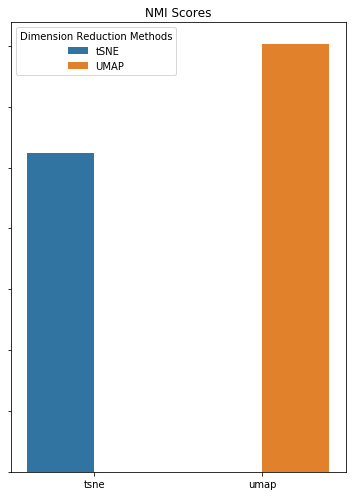

In [0]:
df = normScores[1:3]
df = pd.DataFrame(np.transpose(df))
df['Factor'] = ['tsne','umap']

fig, ax = plt.subplots(figsize=(5, 7))
tidy = df[['Factor', 0]].melt(id_vars='Factor').rename(columns=str.title)
tidy['Dimension Reduction Methods'] = ['tSNE', 'UMAP']
# print(tidy)
a = sns.barplot(x="Factor", y="Value", hue='Dimension Reduction Methods', data=tidy).set_title(label="NMI Scores")

ax.spines['top'].set_visible(True)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set(yticklabels=[])
plt.tight_layout()
plt.show()
# print(tidy)

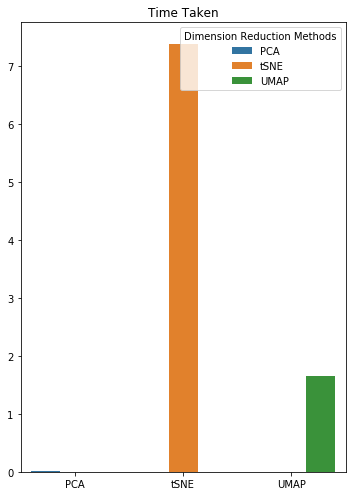

In [0]:

df2 = pd.DataFrame(np.transpose(timeScores))
df2['Factor'] = ['pca','tsne','umap']

fig, ax = plt.subplots(figsize=(5, 7))
tidy2 = df2
# tidy2 = df2.melt(id_vars='Factor').rename(columns=str.title)
tidy2['Dimension Reduction Methods'] = ['PCA','tSNE', 'UMAP']
# print(tidy)
a = sns.barplot(x="Dimension Reduction Methods", y=0, hue='Dimension Reduction Methods', data=tidy2).set_title(label="Time Taken")

ax.spines['top'].set_visible(True)
ax.set_ylabel('')    
ax.set_xlabel('')
# ax.set(yticklabels=[])
plt.tight_layout()
plt.show()

(569, 2)


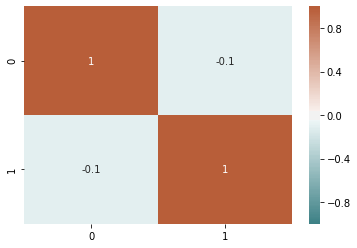

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
pd1 = pd.DataFrame(umapRes)
c1 = pd1.corr(method="spearman")
ax = sns.heatmap(c1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 25, n=200), annot=True)
print(umapRes.shape)

(569, 2)


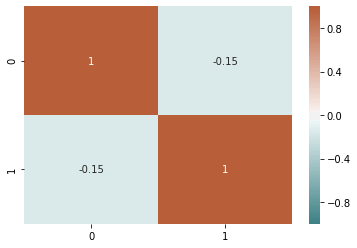

In [0]:
pd1 = pd.DataFrame(umapRes)
c1 = pd1.corr(method="pearson")
ax = sns.heatmap(c1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 25, n=200), annot=True)
print(umapRes.shape)

(569, 2)


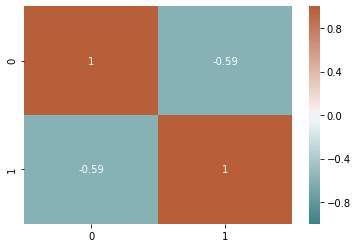

In [0]:
pd2 = pd.DataFrame(tsneRes)
c2 = pd2.corr(method="spearman")
ax = sns.heatmap(c2, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 25, n=200), annot=True)
print(umapRes.shape)


In [0]:
fig, ax = plt.subplots(figsize=(20,20))
pd0 = pd.DataFrame(X)
c0 = pd0.corr(method="spearman")
ax = sns.heatmap(c0, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 25, n=200), annot=True)
print(umapRes.shape)